# Introduction


“Would you recommend a location in Dominican Republic to open a new park?”
The government wants to open a new park. They said park has a lot of attraction and people can run, play, stay with their families, etc.

The government want to concentrated on selection of park location according to irs nearby environment. They has some locations where they want to concentrate the park.

I work with my teammates and select 5 possible locations to build the park. Which location should be suggested to the stakeholder?


# Data

According to the question, following data are required.

1. Geographic coordinate of Dominican Republic parks
I need to compare 5 possible locations with current park in Dominican Republic. Therefore, I need to find a list of Dominican Republic parks and parks geographic coordinates.


In [127]:
# Import necessary library
import json
import pandas as pd

In [128]:
park_locations = [
    { 'Location': 'Downtown Center', 'Address': 'Downtown Center Av. Nuñez de Caceres, Av. Rómulo Betancourt esq, Santo Domingo 10114'},
    { 'Location': 'Silver Sun Gallery', 'Address': 'Av. Tiradentes y Gustavo Mejía Ricard, Santo Domingo'},
    { 'Location': 'Galería 360', 'Address': 'Av. John F. Kennedy, Santo Domingo'},
    { 'Location': 'Agora Mall', 'Address': 'Av. Abraham Lincoln y John F. Kennedy, Santo Domingo'},
    { 'Location': 'Acropolis Center', 'Address': 'Av. Winston Churchill, Santo Domingo'},
]

In [129]:
# install the google map api client library
!pip install -U googlemaps

Requirement already up-to-date: googlemaps in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (3.0.2)
Requirement not upgraded as not directly required: requests<3.0,>=2.11.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from googlemaps) (2.18.4)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests<3.0,>=2.11.1->googlemaps) (3.0.4)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests<3.0,>=2.11.1->googlemaps) (2.6)
Requirement not upgraded as not directly required: urllib3<1.23,>=1.21.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests<3.0,>=2.11.1->googlemaps) (1.22)
Requirement not upgraded as not directly required: certifi>=2017.4.17 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests<3.0,>=2.11.1->googlemaps) (2019.3.9)
tensorflow 

In [130]:
# google_act = None
# with open('google_map_act.json', 'r') as f:
#     google_act = json.load(f)
      
GOOGLE_MAP_API_KEY = 'key'
import googlemaps
gmaps = googlemaps.Client(key=GOOGLE_MAP_API_KEY)

In [131]:
# latlnt = gmaps.geocode('1600 Amphitheatre Parkway, Mountain View, CA')
# print(latlnt)

In [132]:
# Retrieve geolocation and create the dataframe of pending cinema addresses
def getLatLng(address):
    latlnt = gmaps.geocode('{}, Dominican Republic'.format(address))
    return (latlnt[0]['geometry']['location']['lat'], latlnt[0]['geometry']['location']['lng'])

In [133]:
for loc in park_locations:        
    (lat, lng) = getLatLng(loc['Address'])
    loc['Latitude'] = lat
    loc['Longitude'] = lng
    
df_park_locations = pd.DataFrame(park_locations, columns=['Location', 'Address', 'Latitude', 'Longitude'])
df_park_locations

,Location,Address,Latitude,Longitude
0,Downtown Center,"Downtown Center Av. Nuñez de Caceres, Av. Rómu...",18.451144,-69.952780
1,Silver Sun Gallery,"Av. Tiradentes y Gustavo Mejía Ricard, Santo D...",18.475384,-69.926768
2,Galería 360,"Av. John F. Kennedy, Santo Domingo",18.483480,-69.936245
3,Agora Mall,"Av. Abraham Lincoln y John F. Kennedy, Santo D...",18.483768,-69.939700
4,Acropolis Center,"Av. Winston Churchill, Santo Domingo",18.471961,-69.941209


In [134]:
possible_park_locations = [
    { 'Location': 'L1', 'Address': 'Bosque de la Vida, Santo Domingo'},
    { 'Location': 'L2', 'Address': 'Club Los Prados, Inc., Santo Domingo'},
    { 'Location': 'L3', 'Address': 'Club Deportivo y Cultural Metropolitano, Santo Domingo'},
    { 'Location': 'L4', 'Address': 'Fuente Centro de los Heroes, Santo Domingo'},
    { 'Location': 'L5', 'Address': 'Estadio La Normal, Santo Domingo'},
]

In [135]:
for loc in possible_park_locations:        
    (lat, lng) = getLatLng(loc['Address'])
    loc['Latitude'] = lat
    loc['Longitude'] = lng
    
df_possible_park_locations = pd.DataFrame(possible_park_locations, columns=['Location', 'Address', 'Latitude', 'Longitude'])
df_possible_park_locations

,Location,Address,Latitude,Longitude
0,L1,"Bosque de la Vida, Santo Domingo",18.478150,-69.935772
1,L2,"Club Los Prados, Inc., Santo Domingo",18.472567,-69.956904
2,L3,"Club Deportivo y Cultural Metropolitano, Santo...",18.465488,-69.951870
3,L4,"Fuente Centro de los Heroes, Santo Domingo",18.448865,-69.926187
4,L5,"Estadio La Normal, Santo Domingo",18.491626,-69.899758


In [136]:
government_favorite_parks = [
    {'Name': 'Bella Vista Mall', 'Rating': 4.5},
    {'Name': 'Acropolis Center', 'Rating': 4.5},
    {'Name': 'Downtown Center', 'Rating': 4.3},
    {'Name': 'Silver Sun Gallery', 'Rating': 3.4},
    {'Name': 'Agora Mall', 'Rating': 2.3},
    {'Name': 'Galería 360', 'Rating': 1.5},
]

df_government_favorite_parks = pd.DataFrame(government_favorite_parks, columns=['Name','Rating'])
df_government_favorite_parks

,Name,Rating
0,Bella Vista Mall,4.5
1,Acropolis Center,4.5
2,Downtown Center,4.3
3,Silver Sun Gallery,3.4
4,Agora Mall,2.3
5,Galería 360,1.5


The recommended park location needs to have many eating and shopping venues nearby. Convenient public transport is also required.
These data can be found by using FourSquare API to find these venues around the location. The radius of exploration distance is set to 500 meters, which is about 5 minutes walking distance.

In [137]:

fs_categories = {
    'Food': '4d4b7105d754a06374d81259',
    'Shop & Service': '4d4b7105d754a06378d81259',
    'Bus Stop': '52f2ab2ebcbc57f1066b8b4f',
    'Metro Station': '4bf58dd8d48988d1fd931735',
    'Nightlife Spot': '4d4b7105d754a06376d81259',
    'Arts & Entertainment': '4d4b7104d754a06370d81259'
}

In [138]:
# Install FourSquare client library
!pip install foursquare

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [139]:
import foursquare
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
CLIENT_ID = 'client'
CLIENT_SECRET='secet'
fs = foursquare.Foursquare(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)

In [140]:
RADIUS = 500 # 500m, around 5 minutes walking time

# Define a function to search nearby information and convert the result as dataframe
def venues_nearby(latitude, longitude, category, verbose=True):    
    results = fs.venues.search(
        params = {
            'query': category, 
            'll': '{},{}'.format(latitude, longitude),
            'radius': RADIUS,
            'categoryId': fs_categories[category]
        }
    )    
    df = json_normalize(results['venues'])
    cols = ['Name','Latitude','Longitude']    
    if( len(df) == 0 ):        
        df = pd.DataFrame(columns=cols)
    else:
        df.columns
        print(df.columns)
        df = df[['name','location.lat','location.lng']]
        df.columns = cols
    if( verbose ):
        print('{} "{}" venues are found within {}m of location'.format(len(df), category, RADIUS))
    return df

In [141]:
df_park_locations.loc[0]

Location                                       Downtown Center
Address      Downtown Center Av. Nuñez de Caceres, Av. Rómu...
Latitude                                               18.4511
Longitude                                             -69.9528
Name: 0, dtype: object

In [142]:
venues_nearby(df_park_locations.loc[0]['Latitude'], df_park_locations.loc[0]['Longitude'], 'Metro Station').head()

0 "Metro Station" venues are found within 500m of location


,Name,Latitude,Longitude


In [143]:
venues_nearby(df_park_locations.loc[0]['Latitude'], df_park_locations.loc[0]['Longitude'], 'Bus Stop').head()

0 "Bus Stop" venues are found within 500m of location


,Name,Latitude,Longitude


In [144]:
venues_nearby(df_park_locations.loc[0]['Latitude'], df_park_locations.loc[0]['Longitude'], 'Food').head()

Index(['categories', 'hasPerk', 'id', 'location.address', 'location.cc',
       'location.city', 'location.country', 'location.crossStreet',
       'location.distance', 'location.formattedAddress',
       'location.labeledLatLngs', 'location.lat', 'location.lng',
       'location.neighborhood', 'location.postalCode', 'location.state',
       'name', 'referralId'],
      dtype='object')
8 "Food" venues are found within 500m of location


,Name,Latitude,Longitude
0,Ohen Brasserie Food truck,18.454913,-69.953854
1,Food Inc. RD,18.453035,-69.948740
2,El Rancho Steak and Mexican Food,18.450908,-69.952420
3,The Food Shack,18.452681,-69.949616
4,Stavrou's Greek Food Truck,18.450697,-69.948527


In [145]:
venues_nearby(df_park_locations.loc[0]['Latitude'], df_park_locations.loc[0]['Longitude'], 'Arts & Entertainment').head()

0 "Arts & Entertainment" venues are found within 500m of location


,Name,Latitude,Longitude


# Methodology

Combine with FourSquare API which provides how many venues in different category of Dominican Republic parks, a matrix which captured characteristic of venues nearby park are built. Stakeholder's favorite list is the profile to combine with the matrix to become a weighted matrix of favorite cinema.

The weighted matrix can be applied on 5 target locations with venues information to generate a ranking result. The the top one on the ranking list can be recommended to the stakeholder.

In [146]:
park_locations_foursquare = [
    {"place":"Acropolis Center", "address":"Av. Winston Churchill", "category":"Food", "name":"hooters"},
        {"place":"Acropolis Center", "address":"Av. Winston Churchill", "category":"Food", "name":"hooters"},
        {"place":"Acropolis Center", "address":"Av. Winston Churchill", "category":"Shop & Service", "name":"Claro"},
        {"place":"Acropolis Center", "address":"Av. Winston Churchill", "category":"Shop & Service", "name":"Claro"},
        {"place":"Agora Mall", "address":"Av. Abraham Lincoln y John F. Kennedy", "category":"Food", "name":"hooters"},
        {"place":"Agora Mall", "address":"Av. Abraham Lincoln y John F. Kennedy", "category":"Food", "name":"hooters"},
        {"place":"Agora Mall", "address":"Av. Abraham Lincoln y John F. Kennedy", "category":"Shop & Service", "name":"Claro"},
        {"place":"Agora Mall", "address":"Av. Abraham Lincoln y John F. Kennedy", "category":"Shop & Service", "name":"altice"},
        {"place":"Agora Mall", "address":"Av. Abraham Lincoln y John F. Kennedy", "category":"Arts & Entertainment", "name":"Palacio del Cine"},
        {"place":"Agora Mall", "address":"Av. Abraham Lincoln y John F. Kennedy", "category":"Food", "name":"hooters"},
        {"place":"Bella Vista Mall", "address":"Av. Sarasota", "category":"Food", "name":"hooters"},
        {"place":"Bella Vista Mall", "address":"Av. Sarasota", "category":"Food", "name":"hooters"},
        {"place":"Bella Vista Mall", "address":"Av. Sarasota", "category":"Food", "name":"hooters"},
        {"place":"Bella Vista Mall", "address":"Av. Sarasota", "category":"Food", "name":"hooters"},
        {"place":"Blue Mall", "address":"Av. Winston Churchill y Gustavo M. Ricart", "category":"Arts & Entertainment", "name":"Palacio del Cine"},
        {"place":"Blue Mall", "address":"Av. Winston Churchill y Gustavo M. Ricart", "category":"Shop & Service", "name":"Claro"},
        {"place":"Blue Mall", "address":"Av. Winston Churchill y Gustavo M. Ricart", "category":"Shop & Service", "name":"Claro"},
        {"place":"Blue Mall", "address":"Av. Winston Churchill y Gustavo M. Ricart", "category":"Shop & Service", "name":"Claro"},
        {"place":"Blue Mall", "address":"Av. Winston Churchill y Gustavo M. Ricart", "category":"Food", "name":"hooters"},
        {"place":"Blue Mall", "address":"Av. Winston Churchill y Gustavo M. Ricart", "category":"Food", "name":"hooters"},
        {"place":"Blue Mall", "address":"Av. Winston Churchill y Gustavo M. Ricart", "category":"Food", "name":"hooters"},
        {"place":"Blue Mall", "address":"Av. Winston Churchill y Gustavo M. Ricart", "category":"Food", "name":"hooters"},
        {"place":"Downtown Center", "address":"Av. Nuñez de Caceres esq. Rómulo Betancourt, Bella Vista", "category":"Shop & Service", "name":"Claro"},
        {"place":"Downtown Center", "address":"Av. Nuñez de Caceres esq. Rómulo Betancourt, Bella Vista", "category":"Shop & Service", "name":"Claro"},
        {"place":"Downtown Center", "address":"Av. Nuñez de Caceres esq. Rómulo Betancourt, Bella Vista", "category":"Arts & Entertainment", "name":"Palacio del Cine"},
        {"place":"Downtown Center", "address":"Av. Nuñez de Caceres esq. Rómulo Betancourt, Bella Vista", "category":"Food", "name":"hooters"},
        {"place":"Downtown Center", "address":"Av. Nuñez de Caceres esq. Rómulo Betancourt, Bella Vista", "category":"Food", "name":"hooters"},
        {"place":"Downtown Center", "address":"Av. Nuñez de Caceres esq. Rómulo Betancourt, Bella Vista", "category":"Food", "name":"hooters"},
        {"place":"Downtown Center", "address":"Av. Nuñez de Caceres esq. Rómulo Betancourt, Bella Vista", "category":"Food", "name":"hooters"},
        {"place":"Downtown Center", "address":"Av. Nuñez de Caceres esq. Rómulo Betancourt, Bella Vista", "category":"Food", "name":"hooters"},
        {"place":"Downtown Center", "address":"Av. Nuñez de Caceres esq. Rómulo Betancourt, Bella Vista", "category":"Food", "name":"hooters"},
        {"place":"Galería 360", "address":"Av. John F. Kennedy", "category":"Metro Station", "name":"hooters"},
        {"place":"Galería 360", "address":"Av. John F. Kennedy", "category":"Shop & Service", "name":"Claro"},
        {"place":"Galería 360", "address":"Av. John F. Kennedy", "category":"Shop & Service", "name":"Claro"},
        {"place":"Galería 360", "address":"Av. John F. Kennedy", "category":"Shop & Service", "name":"Claro"},
        {"place":"Galería 360", "address":"Av. John F. Kennedy", "category":"Shop & Service", "name":"Claro"},
        {"place":"Galería 360", "address":"Av. John F. Kennedy", "category":"Food", "name":"hooters"},
        {"place":"Galería 360", "address":"Av. John F. Kennedy", "category":"Food", "name":"hooters"},
        {"place":"Galería 360", "address":"Av. John F. Kennedy", "category":"Food", "name":"hooters"},
        {"place":"Galería 360", "address":"Av. John F. Kennedy", "category":"Food", "name":"hooters"},
        {"place":"Diamond Plaza", "address":"Av. Los Proceres", "category":"Arts & Entertainment", "name":"hooters"},
        {"place":"Diamond Plaza", "address":"Av. Los Proceres", "category":"Food", "name":"hooters"},
        {"place":"Diamond Plaza", "address":"Av. Los Proceres", "category":"Food", "name":"hooters"},
        {"place":"Novo Centro", "address":"Av. Lope de Vega, entre Roberto Pastoriza y Gustavo Mejía Ricart", "category":"Arts & Entertainment", "name":"Palacio del Cine"},
        {"place":"Novo Centro", "address":"Av. Lope de Vega, entre Roberto Pastoriza y Gustavo Mejía Ricart", "category":"Food", "name":"hooters"},
        {"place":"Novo Centro", "address":"Av. Lope de Vega, entre Roberto Pastoriza y Gustavo Mejía Ricart", "category":"Food", "name":"hooters"},
        {"place":"Centro Comercial Sambil", "address":"Av. John F. Kennedy y Máximo Gómez", "category":"Metro Station", "name":"hooters"},
        {"place":"Centro Comercial Sambil", "address":"Av. John F. Kennedy y Máximo Gómez", "category":"Shop & Service", "name":"Claro"},
        {"place":"Centro Comercial Sambil", "address":"Av. John F. Kennedy y Máximo Gómez", "category":"Shop & Service", "name":"Claro"},
        {"place":"Centro Comercial Sambil", "address":"Av. John F. Kennedy y Máximo Gómez", "category":"Shop & Service", "name":"Claro"},
        {"place":"Centro Comercial Sambil", "address":"Av. John F. Kennedy y Máximo Gómez", "category":"Shop & Service", "name":"Claro"},
        {"place":"Centro Comercial Sambil", "address":"Av. John F. Kennedy y Máximo Gómez", "category":"Shop & Service", "name":"Claro"},
        {"place":"Centro Comercial Sambil", "address":"Av. John F. Kennedy y Máximo Gómez", "category":"Arts & Entertainment", "name":"Palacio del Cine"},
        {"place":"Centro Comercial Sambil", "address":"Av. John F. Kennedy y Máximo Gómez", "category":"Food", "name":"hooters"},
        {"place":"Centro Comercial Sambil", "address":"Av. John F. Kennedy y Máximo Gómez", "category":"Food", "name":"hooters"},
        {"place":"Centro Comercial Sambil", "address":"Av. John F. Kennedy y Máximo Gómez", "category":"Food", "name":"hooters"},
        {"place":"Centro Comercial Sambil", "address":"Av. John F. Kennedy y Máximo Gómez", "category":"Food", "name":"hooters"},
        {"place":"Silver Sun Gallery", "address":"Av. Tiradentes y Gustavo Mejía Ricard", "category":"Arts & Entertainment", "name":"Palacio del Cine"},
        {"place":"Silver Sun Gallery", "address":"Av. Tiradentes y Gustavo Mejía Ricard", "category":"Shop & Service", "name":"Claro"},
        {"place":"Silver Sun Gallery", "address":"Av. Tiradentes y Gustavo Mejía Ricard", "category":"Shop & Service", "name":"Claro"},
        {"place":"Silver Sun Gallery", "address":"Av. Tiradentes y Gustavo Mejía Ricard", "category":"Shop & Service", "name":"Claro"},
        {"place":"Silver Sun Gallery", "address":"Av. Tiradentes y Gustavo Mejía Ricard", "category":"Shop & Service", "name":"Claro"},
        {"place":"Silver Sun Gallery", "address":"Av. Tiradentes y Gustavo Mejía Ricard", "category":"Shop & Service", "name":"Claro"},
        {"place":"Silver Sun Gallery", "address":"Av. Tiradentes y Gustavo Mejía Ricard", "category":"Shop & Service", "name":"Claro"},
        {"place":"Silver Sun Gallery", "address":"Av. Tiradentes y Gustavo Mejía Ricard", "category":"Food", "name":"hooters"},
        {"place":"Silver Sun Gallery", "address":"Av. Tiradentes y Gustavo Mejía Ricard", "category":"Food", "name":"hooters"},
        {"place":"Silver Sun Gallery", "address":"Av. Tiradentes y Gustavo Mejía Ricard", "category":"Food", "name":"hooters"},
        {"place":"Silver Sun Gallery", "address":"Av. Tiradentes y Gustavo Mejía Ricard", "category":"Food", "name":"hooters"},
        {"place":"Silver Sun Gallery", "address":"Av. Tiradentes y Gustavo Mejía Ricard", "category":"Food", "name":"hooters"},
        {"place":"Plaza Megacentro", "address":"Av. San Vicente de Paul", "category":"Shop & Service", "name":"Claro"},
        {"place":"Plaza Megacentro", "address":"Av. San Vicente de Paul", "category":"Shop & Service", "name":"Claro"},
        {"place":"Plaza Megacentro", "address":"Av. San Vicente de Paul", "category":"Shop & Service", "name":"Claro"},
        {"place":"Plaza Megacentro", "address":"Av. San Vicente de Paul", "category":"Shop & Service", "name":"Claro"},
        {"place":"Plaza Megacentro", "address":"Av. San Vicente de Paul", "category":"Shop & Service", "name":"Claro"},
        {"place":"Plaza Megacentro", "address":"Av. San Vicente de Paul", "category":"Arts & Entertainment", "name":"Megaplex 10"},
        {"place":"Plaza Megacentro", "address":"Av. San Vicente de Paul", "category":"Food", "name":"hooters"},
        {"place":"Plaza Megacentro", "address":"Av. San Vicente de Paul", "category":"Food", "name":"hooters"}
]

In [147]:
for loc in park_locations_foursquare:        
    (lat, lng) = getLatLng(loc['address'])
    loc['Latitude'] = lat
    loc['Longitude'] = lng
    
df_park_locations_foursquare = pd.DataFrame(park_locations_foursquare, columns=['place', 'address', 'Latitude', 'Longitude', 'category', 'name'])
df_park_locations_foursquare

,place,address,Latitude,Longitude,category,name
0,Acropolis Center,Av. Winston Churchill,18.471961,-69.941209,Food,hooters
1,Acropolis Center,Av. Winston Churchill,18.471961,-69.941209,Food,hooters
2,Acropolis Center,Av. Winston Churchill,18.471961,-69.941209,Shop & Service,Claro
3,Acropolis Center,Av. Winston Churchill,18.471961,-69.941209,Shop & Service,Claro
4,Agora Mall,Av. Abraham Lincoln y John F. Kennedy,18.483768,-69.939700,Food,hooters
5,Agora Mall,Av. Abraham Lincoln y John F. Kennedy,18.483768,-69.939700,Food,hooters
6,Agora Mall,Av. Abraham Lincoln y John F. Kennedy,18.483768,-69.939700,Shop & Service,Claro
7,Agora Mall,Av. Abraham Lincoln y John F. Kennedy,18.483768,-69.939700,Shop & Service,altice
8,Agora Mall,Av. Abraham Lincoln y John F. Kennedy,18.483768,-69.939700,Arts & Entertainment,Palacio del Cine
9,Agora Mall,Av. Abraham Lincoln y John F. Kennedy,18.483768,-69.939700,Food,hooters


In [148]:
df_park_locations_foursquare['category'].value_counts().to_frame(name='Count')

,Count
Food,38
Shop & Service,29
Arts & Entertainment,8
Metro Station,2


In [149]:
df_park_locations_foursquare.shape

(77, 6)

In [150]:
df_target_venues = pd.DataFrame(columns=['Location', 'Category', 'Name', 'Latitude', 'Longitude'])
for (location, address, latitude, longitude) in df_possible_park_locations.itertuples(index=False):
    for cat, cat_id in fs_categories.items():
        df = venues_nearby(latitude, longitude, cat, verbose=False)
        df['Location'] = location
        df['Category'] = cat
        df_target_venues = df_target_venues.append(df)

Index(['categories', 'hasPerk', 'id', 'location.address', 'location.cc',
       'location.city', 'location.country', 'location.crossStreet',
       'location.distance', 'location.formattedAddress',
       'location.labeledLatLngs', 'location.lat', 'location.lng',
       'location.state', 'name', 'referralId'],
      dtype='object')
Index(['categories', 'hasPerk', 'id', 'location.cc', 'location.country',
       'location.distance', 'location.formattedAddress',
       'location.labeledLatLngs', 'location.lat', 'location.lng', 'name',
       'referralId'],
      dtype='object')
Index(['categories', 'hasPerk', 'id', 'location.address', 'location.cc',
       'location.city', 'location.country', 'location.crossStreet',
       'location.distance', 'location.formattedAddress',
       'location.labeledLatLngs', 'location.lat', 'location.lng',
       'location.state', 'name', 'referralId'],
      dtype='object')
Index(['categories', 'hasPerk', 'id', 'location.address', 'location.cc',
       'loc

In [151]:
df_target_venues.head()

,Category,Latitude,Location,Longitude,Name
0,Food,18.475530,L1,-69.933937,Cibus Street Fast Food
1,Food,18.472933,L1,-69.934379,La Terracita Food And Drink
2,Food,18.472365,L1,-69.935076,Laurel Food & Wine
0,Nightlife Spot,18.475837,L1,-69.936309,Spot Lincon
0,Shop & Service,18.476763,L1,-69.936703,Boss shop Santo Domingo


In [152]:
df_target_venues['Category'].value_counts().to_frame(name='Count')

,Count
Shop & Service,23
Food,8
Metro Station,2
Nightlife Spot,1


In [153]:
df_target_venues.shape

(34, 5)

In [154]:
df_venues_count = df_park_locations_foursquare.groupby(['place','category'], as_index=False).count()
df_venues_count.drop(columns=['Latitude','Longitude'], inplace=True)
df_venues_count.rename(columns={'name':'Count'}, inplace=True)
df_venues_count.head()

,place,category,address,Count
0,Acropolis Center,Food,2,2
1,Acropolis Center,Shop & Service,2,2
2,Agora Mall,Arts & Entertainment,1,1
3,Agora Mall,Food,3,3
4,Agora Mall,Shop & Service,2,2


In [155]:
df_venues_count = df_venues_count.pivot(index='place', columns='category', values='Count').fillna(0)
df_venues_count.head()

category,Arts & Entertainment,Food,Metro Station,Shop & Service
place,,,,
Acropolis Center,0.0,2.0,0.0,2.0
Agora Mall,1.0,3.0,0.0,2.0
Bella Vista Mall,0.0,4.0,0.0,0.0
Blue Mall,1.0,4.0,0.0,3.0
Centro Comercial Sambil,1.0,4.0,1.0,5.0


In [156]:
# Do the same process on target locations
df_target_venues_count = df_target_venues.groupby(['Location','Category']).size().reset_index(name='Count')
df_target_venues_count = df_target_venues_count.pivot(index='Location', columns='Category', values='Count').fillna(0)

In [157]:
df_target_venues_count

Category,Food,Metro Station,Nightlife Spot,Shop & Service
Location,,,,
L1,3.0,0.0,1.0,5.0
L2,3.0,0.0,0.0,7.0
L3,1.0,0.0,0.0,5.0
L4,1.0,1.0,0.0,4.0
L5,0.0,1.0,0.0,2.0


In [166]:
# Check the Dominican Republic park list contains all stakeholder's favorite parks
# print(government_favorite_parks)
names = [ cinema for cinema in df_government_favorite_parks['Name'] ]
# names
df_park_locations[df_park_locations.Location.isin(names)]

,Location,Address,Latitude,Longitude
0,Downtown Center,"Downtown Center Av. Nuñez de Caceres, Av. Rómu...",18.451144,-69.952780
1,Silver Sun Gallery,"Av. Tiradentes y Gustavo Mejía Ricard, Santo D...",18.475384,-69.926768
2,Galería 360,"Av. John F. Kennedy, Santo Domingo",18.483480,-69.936245
3,Agora Mall,"Av. Abraham Lincoln y John F. Kennedy, Santo D...",18.483768,-69.939700
4,Acropolis Center,"Av. Winston Churchill, Santo Domingo",18.471961,-69.941209


In [168]:
df_boss_favorite = pd.DataFrame(government_favorite_parks, columns=['Name','Rating'])
df_boss_favorite

,Name,Rating
0,Bella Vista Mall,4.5
1,Acropolis Center,4.5
2,Downtown Center,4.3
3,Silver Sun Gallery,3.4
4,Agora Mall,2.3
5,Galería 360,1.5


Data Analysis

In [169]:
!conda install seaborn=0.9 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - seaborn=0.9


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.9.0              |           py35_0         378 KB
    openssl-1.0.2s             |       h7b6447c_0         3.1 MB
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following packages will be UPDATED:

    openssl: 1.0.2r-h7b6447c_0    --> 1.0.2s-h7b6447c_0
    seaborn: 0.8.0-py35h15a2772_0 --> 0.9.0-py35_0     


seaborn-0.9.0        | 378 KB    | ##################################### | 100% 
openssl-1.0.2s       | 3.1 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [170]:

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [171]:
df_venues_count.describe()

category,Arts & Entertainment,Food,Metro Station,Shop & Service
count,11.000000,11.000000,11.000000,11.000000
mean,0.727273,3.454545,0.181818,2.636364
std,0.467099,1.368476,0.404520,2.157440
min,0.000000,2.000000,0.000000,0.000000
25%,0.500000,2.000000,0.000000,1.000000
50%,1.000000,4.000000,0.000000,2.000000
75%,1.000000,4.000000,0.000000,4.500000
max,1.000000,6.000000,1.000000,6.000000


In [172]:
df_venues_count['Food'].value_counts().sort_index().to_frame('Cinema Count')

,Cinema Count
2.0,4
3.0,1
4.0,4
5.0,1
6.0,1


In [174]:
df_venues_count[df_venues_count['Food'] > 2]

category,Arts & Entertainment,Food,Metro Station,Shop & Service
place,,,,
Agora Mall,1.0,3.0,0.0,2.0
Bella Vista Mall,0.0,4.0,0.0,0.0
Blue Mall,1.0,4.0,0.0,3.0
Centro Comercial Sambil,1.0,4.0,1.0,5.0
Downtown Center,1.0,6.0,0.0,2.0
Galería 360,0.0,4.0,1.0,4.0
Silver Sun Gallery,1.0,5.0,0.0,6.0


In [179]:
metro_over_2 = df_venues_count[df_venues_count['Food'] > 2].index.tolist()
df_park_locations_foursquare[(df_park_locations_foursquare['place'].isin(metro_over_2)) & (df_park_locations_foursquare.category == 'Food')]

,place,address,Latitude,Longitude,category,name
4,Agora Mall,Av. Abraham Lincoln y John F. Kennedy,18.483768,-69.939700,Food,hooters
5,Agora Mall,Av. Abraham Lincoln y John F. Kennedy,18.483768,-69.939700,Food,hooters
9,Agora Mall,Av. Abraham Lincoln y John F. Kennedy,18.483768,-69.939700,Food,hooters
10,Bella Vista Mall,Av. Sarasota,18.453526,-69.942752,Food,hooters
11,Bella Vista Mall,Av. Sarasota,18.453526,-69.942752,Food,hooters
12,Bella Vista Mall,Av. Sarasota,18.453526,-69.942752,Food,hooters
13,Bella Vista Mall,Av. Sarasota,18.453526,-69.942752,Food,hooters
18,Blue Mall,Av. Winston Churchill y Gustavo M. Ricart,18.471961,-69.941209,Food,hooters
19,Blue Mall,Av. Winston Churchill y Gustavo M. Ricart,18.471961,-69.941209,Food,hooters
20,Blue Mall,Av. Winston Churchill y Gustavo M. Ricart,18.471961,-69.941209,Food,hooters


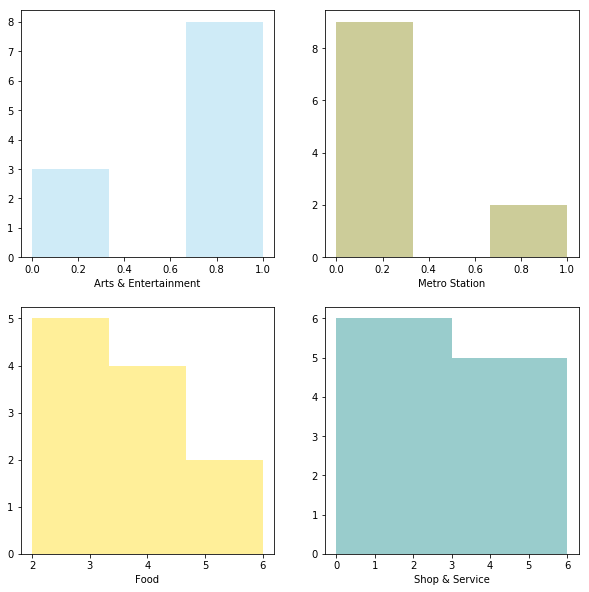

In [182]:
f, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.distplot(df_venues_count['Arts & Entertainment'] , color="skyblue", ax=axes[0, 0], kde=False)
sns.distplot(df_venues_count['Metro Station'] , color="olive", ax=axes[0, 1], kde=False)
sns.distplot(df_venues_count['Food'] , color="gold", ax=axes[1, 0], kde=False)
sns.distplot(df_venues_count['Shop & Service'] , color="teal", ax=axes[1, 1], kde=False)

In [183]:
df_venues_count.corr()

category,Arts & Entertainment,Food,Metro Station,Shop & Service
category,,,,
Arts & Entertainment,1.000000,0.056888,-0.240563,0.189443
Food,0.056888,1.000000,0.197066,0.332549
Metro Station,-0.240563,0.197066,1.000000,0.427083
Shop & Service,0.189443,0.332549,0.427083,1.000000


Find P-Value of the variables

By convention, when the p-value is:

< 0.001 we say there is strong evidence that the correlation is significant,
< 0.05; there is moderate evidence that the correlation is significant,
< 0.1; there is weak evidence that the correlation is significant, and
is > 0.1; there is no evidence that the correlation is significant.

In [184]:
from scipy import stats

In [185]:
p_value_data = []
for left in df_venues_count.columns:
    p_values = [left]
    for right in df_venues_count.columns:        
        pearson_coef, p_value = stats.pearsonr(df_venues_count[left], df_venues_count[right])
        if(p_value < 0.001):
            p_values.append('strong')
        elif(p_value < 0.05):
            p_values.append('moderate')
        elif(p_value < 0.1):
            p_values.append('weak')
        else:
            p_values.append('no')            
    p_value_data.append(p_values)

In [187]:
df_p_values = pd.DataFrame(p_value_data, columns=['Category'] + df_venues_count.columns.tolist())
df_p_values

,Category,Arts & Entertainment,Food,Metro Station,Shop & Service
0,Arts & Entertainment,strong,no,no,no
1,Food,no,strong,no,no
2,Metro Station,no,no,strong,no
3,Shop & Service,no,no,no,strong


In [188]:
!conda install -c conda-forge folium=0.5 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will b

In [189]:
hk_coords = getLatLng('Dominican Republic')

In [191]:
hk_map = folium.Map(location=hk_coords, zoom_start=12, tiles='Stamen Toner')

cinemas_fg = folium.FeatureGroup()
targets_fg = folium.FeatureGroup()

for(location, address, latitude, longitude) in possible_park_locations.itertuples(index=False):
    targets_fg.add_child(
        folium.features.CircleMarker(
            location=(latitude, longitude),
            popup=location,
            radius=5,
            fill=True,
            color='yellow',
            fill_opacity=1.
        )
    )

boss_ratings = df_boss_favorite.set_index('Name')    
name_list = boss_ratings.index.tolist()

for (name, address, latitude, longitude ) in park_locations.itertuples(index=False):    
    
    color = 'blue'        
    popup = name
    
    if( name in name_list ):
        color = 'red'    
        popup = '{} - Rating: {}'.format(name, df_government_favorite_parks.loc[name,'Rating'])
        
    cinemas_fg.add_child(        
        folium.features.CircleMarker(
            location=(latitude, longitude),
            popup=popup,
            radius=5,
            fill=True,
            color=color,
            fill_opacity=1.
        )
    )
    
hk_map.add_child(cinemas_fg)
hk_map.add_child(targets_fg)

AttributeError: 'list' object has no attribute 'itertuples'

Most of Dominican parks (blue circle) and stakeholder's favorite parks (red circle) location are built near main road, and centralized in urban area of Dominican Republic. The target locations (yellow circle) of new cinema are not near to main road.


### Machine Learning
Now, let's use Content-Based or Item-Item recommendation systems. In this case, I am going to try to figure out the boss's favorite new cinema location by counting number of nearby venues and ratings given.

Normalize the values of venues dataframe by using MinMaxScaler method

# Results

Results section where you discuss the results.

With the boss's profile and the complete list of parks and their venues count in hand, I am going to take the weighted average of every location based on the profile and recommend the top location that most satisfy it.

The result is reasonable. Location "L5" has the most number of venues in category "Bus Stop", "Food", "Metro Station" and "Shop & Service".

In [ ]:
print('I should recommend the location "{}" of address "{}" to the stackholder'.format(df_final.iat[0,0], df_final.iat[0,1]))

# Discussion

I should contact local commercial property agents to find more suitable locations. Moreover, FourSquare is not popular in Hong Kong, the data maybe out-dated or unreliable, the report should gather more data from other location data source such as Google Place API.

In [ ]:
df_venues_count.mean().to_frame(name='Average Count')
df_target_venues_count.mean().to_frame('Average Count')

# Conclusion


Conclusion section where you conclude the report.

The stakeholder's problem is resolved. Stakeholder wants to find the best place to build a new park in Dominican Reublic, and the factors of "best location" is based on the number of venues in eating, shopping, transportation category around the location. Stakeholder also provide his favorite list of park to further explain what the "best location" is. Content-based filtering machine learning technique is the most suitable method to resolve the problem. It combines stakeholder's preference and cinema profile to make the recommendation result.

The 5 target locations of new park may not be a good choices. As the weighting matrix is developed, I can quickly pick other locations and make the recommendation again.